In [8]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/home/sumit/Malaria-Detection/cellImages/train'
valid_path = '/home/sumit/Malaria-Detection/cellImages/val'

In [4]:
  # useful for getting number of output classes
folders = glob('/home/sumit/Malaria-Detection/cellImages/train/*')

In [5]:
folders

['/home/sumit/Malaria-Detection/cellImages/train/Uninfected',
 '/home/sumit/Malaria-Detection/cellImages/train/Parasitized']

In [6]:
from tensorflow.keras.layers import MaxPooling2D

In [7]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

2022-04-07 00:12:06.323712: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/home/sumit/Malaria-Detection/cellImages/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 19290 images belonging to 2 classes.


In [11]:
training_set

In [12]:
test_set = test_datagen.flow_from_directory('/home/sumit/Malaria-Detection/cellImages/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8268 images belonging to 2 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
) 

/tmp/ipykernel_3728/3705606069.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
603/603 [==============================] - 544s 901ms/step - loss: 0.4004 - accuracy: 0.8416 - val_loss: 0.2011 - val_accuracy: 0.9463
Epoch 2/20
603/603 [==============================] - 512s 849ms/step - loss: 0.2092 - accuracy: 0.9341 - val_loss: 0.1762 - val_accuracy: 0.9494
Epoch 3/20
603/603 [==============================] - 506s 838ms/step - loss: 0.1742 - accuracy: 0.9468 - val_loss: 0.1752 - val_accuracy: 0.9471
Epoch 4/20
603/603 [==============================] - 506s 839ms/step - loss: 0.1698 - accuracy: 0.9482 - val_loss: 0.1633 - val_accuracy: 0.9548
Epoch 5/20
603/603 [==============================] - 506s 839ms/step - loss: 0.1719 - accuracy: 0.9463 - val_loss: 0.1518 - val_accuracy: 0.9548
Epoch 6/20
603/603 [==============================] - 506s 838ms/step - loss: 0.1539 - accuracy: 0.9528 - val_loss: 0.1565 - val_accuracy: 0.9517
Epoch 7/20
603/603 [==============================] - 506s 839ms/step - loss: 0.1420 - accuracy: 0.9550 - val_loss: 0.1437 -

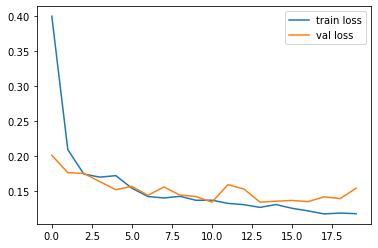

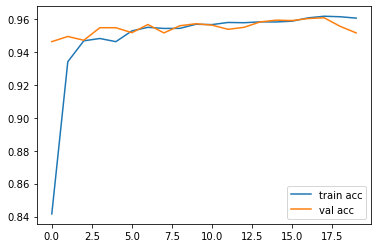

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_CNN')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_CNN')

In [31]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_CNN.h5')

In [17]:

y_pred = model.predict(test_set)


In [18]:
y_pred

array([[1.1610996e-04, 9.9988389e-01],
       [6.8473779e-02, 9.3152624e-01],
       [7.2080618e-01, 2.7919385e-01],
       ...,
       [9.9321836e-01, 6.7815920e-03],
       [9.9295795e-01, 7.0421095e-03],
       [9.9928099e-01, 7.1902236e-04]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [11]:
model=load_model('model_CNN.h5')

2022-04-07 09:38:55.698452: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-04-07 09:38:55.698514: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: sumit-rog
2022-04-07 09:38:55.698524: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: sumit-rog
2022-04-07 09:38:55.698783: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 495.29.5
2022-04-07 09:38:55.698816: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.103.1
2022-04-07 09:38:55.698825: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 470.103.1 does not match DSO version 495.29.5 -- cannot find working devices in this configuration
2022-04-07 09:38:55.699759: I tensorflow/core/platform/cpu_feature_guard.cc:151] This Tensor

In [23]:
img=image.load_img('/home/sumit/Malaria-Detection/cellImages/train/Parasitized/C33P1thinF_IMG_20150619_115740a_cell_163.png',target_size=(224,224))


In [24]:
x=image.img_to_array(img)


In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [1]:
model.predict(img_data)

NameError: name 'model' is not defined

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
